# Aula 06 - Hipótese e Inferência

# Exercício 01:

Joãozinho fez a prova do POSCOMP, que tem 70 questões de múltipla escolha com 4 opções por questão, e tirou 35. Incomodado com a sua nota, e a fim de irritar os seus colegas, ele disse que "chutou todas as questões", ou seja, escolheu aleatoriamente todas as respostas dadas. Sabendo disso, responda:

(a) Qual é a média de acertos esperados no POSCOMP para pessoas que escolhem aleatoriamente as respostas? Indique o intervalo de notas ao redor da média que representa 95% das notas.

__Importante:__  
Para responder à essa questão, crie uma função _a()_ que retorna uma lista de três elementos, sendo que o __segundo__ é a __média__ e o primeiro e o terceiro correspondem aos limites do intervalo ao redor da média que representa 95% das notas. Os valores da lista devem ter uma precisão de 4 casas decimais.  
_Exemplo de saída: [1.2345, 2.0, 3.2345]_, onde 2.0 é o valor da média e o intervalo é (1.2345, 3.2345).


__Dica:__  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [6]:
# YOUR CODE HERE
from scipy.stats import norm
import math

def normal_approximation_to_binomial(n, p):
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

def normal_upper_bound(probability, mu=0, sigma=1):
    return norm.isf(1-probability, mu, sigma)
    
def normal_lower_bound(probability, mu=0, sigma=1):
    return norm.isf(probability, mu, sigma)

def a():
        mu, sigma = normal_approximation_to_binomial(70,0.25)
        ub = normal_upper_bound(0.95, mu, sigma)
        lb = normal_lower_bound(0.95, mu, sigma)
        
        return [round(lb, 4), round(mu,4), round(ub, 4)]
a()
    
    

[11.541, 17.5, 23.459]

(b) Qual a probabilidade de Joãozinho ter acertado um valor tão alto quanto 35 em escolhas aleatórias de respostas? 

__Importante:__  
Para responder à essa questão, crie uma função _b()_ que retorna esse valor de probabilidade com uma precisão de 10 casas decimais.

__Dica:__  
calcule o *p-valor* para 35.  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [7]:
# YOUR CODE HERE
from scipy.stats import norm
import math

def normal_approximation_to_binomial(n, p):
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

normal_probability_below = norm.cdf

def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - norm.cdf(lo, mu, sigma)

def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        return 2 * normal_probability_below(x, mu, sigma)

def b():
    mu, sigma = normal_approximation_to_binomial(70,0.25)
    return round(two_sided_p_value(35, mu, sigma)/2, 10)

b()

6.811e-07

# Exercício 02:


Você quer verificar se uma moeda é justa. Você assume inicialmente que ela é justa e define que a probabilidade $p$ de dar "cara" vem de uma distribuição a priori __Beta($\alpha=4, \beta=4$)__. Imprima os parâmetros $\alpha$ e $\beta$ e plote a PDF distribuição a posteriori de $p$ logo depois de observar os seguintes lançamentos de moeda:

(a) 4 "caras" e 8 "coroas"

(b) 23 "caras" e 27 "coroas"

(c) 33 "caras" e 17 "coroas"


__Importante:__  
Use todo o histórico de lançamentos para plotar a posteriori da distribuição de $p$, isto é, a posteriori do último lançamento (letra "c") deve considerar os lançamentos feitos na letra "a" e na letra "b".


In [8]:
matplotlib inline

In [9]:
priori = np.array([4, 4])
lancamentos = np.array([[4, 8],
                        [23, 27],
                        [33, 17]])

a priori -- alpha: 4 , beta: 4
1o lançamento -- alpha: 8 , beta: 12
2o lançamento -- alpha: 31 , beta: 39
3o lançamento -- alpha: 64 , beta: 56


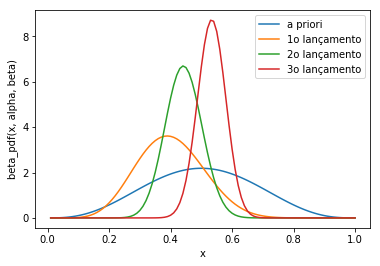

In [10]:
# YOUR CODE HERE
from matplotlib import pyplot as plt
import numpy as np
import math


def B(alpha, beta):
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:
        # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

x = [round(x, 4) for x in np.arange(0.01, 1.01, 0.01)]

alpha = 4
beta = 4
print('a priori --', 'alpha:', alpha, ', beta:', beta)
plt.plot(x, [beta_pdf(i, alpha, beta) for i in x], label='a priori')
plt.legend()

# primeiro lançamento
alpha += 4
beta += 8
print('1o lançamento --', 'alpha:', alpha, ', beta:', beta)
plt.plot(x, [beta_pdf(i, alpha, beta) for i in x], label='1o lançamento')
plt.legend()

# segundo lançamento
alpha += 23
beta += 27
print('2o lançamento --', 'alpha:', alpha, ', beta:', beta)
plt.plot(x, [beta_pdf(i, alpha, beta) for i in x], label='2o lançamento')
plt.legend()

# terceiro lançamento
alpha += 33
beta += 17
print('3o lançamento --', 'alpha:', alpha, ', beta:', beta)
plt.plot(x, [beta_pdf(i, alpha, beta) for i in x], label='3o lançamento')
plt.legend()

plt.xlabel('x')
plt.ylabel('beta_pdf(x, alpha, beta)')
plt.show()


# Exercício 03:


Considere a função `sample_from_binomial_100`, que retorna o número de sucessos gerados em 100 testes de Bernoulli. 


In [11]:
def sample_from_binomial_100():
    return np.random.binomial(100, 0.42)

Apesar de estar escrito na função, assuma você não sabe o valor do parâmetro $p$. Escreva um programa para estimar o valor do parâmetro $p$ usando inferência Bayesiana. 

Para lhe ajudar, use a função abaixo, que retorna os hiperparâmetros da posteriori a partir do número de caras e de coroas observado e dos hiperparâmetros da priori.

In [12]:
def get_posterior(n_caras, n_coroas, alpha_priori, beta_priori):
    return (n_caras+alpha_priori, n_coroas+beta_priori)

Assim, defina uma priori Beta para o parâmetro $p$ e faça a amostragem de "caras" e "coroas" a partir da função `sample_from_binomial_100`. Com essas informações, calcule a distribuição posteriori de $p$ e amostre um valor de $p$ dessa distribuição. Salve esse valor de $p$ em uma lista. Troque os hiperparâmetros da priori pelos da posteriori e repita todo o processo. Quando os últimos $5$ valores de $p$ registrados tiverem uma variância menor que `0.0001`, interrompa o processo e imprima:

(a) a média desses últimos $5$ valores de $p$;

(b) a última distribuição a posteriori que você calculou (plot). 

0.4366084612693951


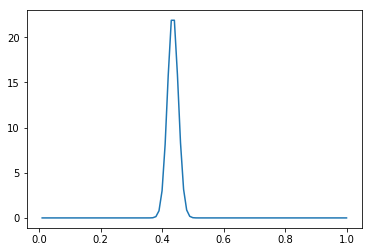

In [13]:
# YOUR CODE HERE
from scipy.stats import beta
import numpy as np


p = []
a = 1
b = 1

while True:
    if len(p) > 4 and np.var(p[-5:]) < 0.0001:
        break
    
    caras = sample_from_binomial_100()
    coroas = 100 - caras
    a, b = get_posterior(caras, coroas, a, b)
    p.append(beta.mean(a, b))

media = np.mean(p[-5:])
x = [round(x, 4) for x in np.arange(0.01, 1.01, 0.01)]

print(media)
plt.plot(x, [beta.pdf(i, a, b) for i in x])
plt.show()